# Vaccination Probability Fit

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import nafot
from tqdm import tqdm, tqdm_notebook
from scipy.stats import beta
from scipy.stats import gamma
%matplotlib inline

## Load the vaccination probability data

In [27]:
# Load vaccination probability data
vaccination_prob = pd.read_csv('../../data/vaccination_data/vaccination_proba_without_2017.txt', header=None)
# Load the random patient id for each prediction
vaccination_prob_test_set_ids = pd.read_csv('../../data/vaccination_data/vaccination_proba_without_2017_test_set.csv', header=None)[1]#, index_col=0)

# Load demographic data
dem_data = pd.read_csv('../../data/vaccination_data/sample_dem_data.txt')
dem_data.set_index('random_ID', inplace=True)

In [28]:
# Add the random ID fore each prediction
vaccination_prob['random_ID'] = vaccination_prob_test_set_ids.values
vaccination_prob.columns = ['vacc_prob', 'random_ID']
vaccination_prob.set_index('random_ID', inplace=True)

In [29]:
# Add clinic_code and birth year
vaccination_prob = vaccination_prob.join(dem_data[['stat_code', 'birth_year']])
# Add age group (1 if adult)
vaccination_prob['is_adult'] = vaccination_prob.birth_year.apply(lambda birth_year: ((2017-birth_year) > 18)*1)
# Get only relevant columns
vaccination_prob = vaccination_prob[['stat_code', 'is_adult', 'vacc_prob']]
vaccination_prob.columns = ['clinc_code', 'is_adult', 'vacc_prob']
# Save
vaccination_prob.to_csv('../../data/vaccination_data/vaccination_proba_with_age_clinic.csv', index=False)

## Fit - Didn't work

Fit the data to a beta distribution and find the best parameters

In [172]:
p = gamma.fit(vaccination_prob)
p

(0.8512065837026235, 0.03379999999999999, 0.369018531210516)

In [181]:
params = beta.fit(vaccination_prob)
print(f'a = {params[0]:.3f}, b = {params[1]:.3f}, loc={params[2]:.3f}, scale={params[3]:.3f}')

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


a = 0.901, b = 1.522, loc=0.034, scale=0.952


In [184]:
params_1 = beta.fit(vacc_1)
print(f'a = {params[0]:.3f}, b = {params[1]:.3f}, loc={params[2]:.3f}, scale={params[3]:.3f}')

a = 0.901, b = 1.522, loc=0.034, scale=0.952


In [183]:
params_2 = beta.fit(vacc_2)
print(f'a = {params[0]:.3f}, b = {params[1]:.3f}, loc={params[2]:.3f}, scale={params[3]:.3f}')

a = 0.901, b = 1.522, loc=0.034, scale=0.952


### Plot desity and PDF

#### All data

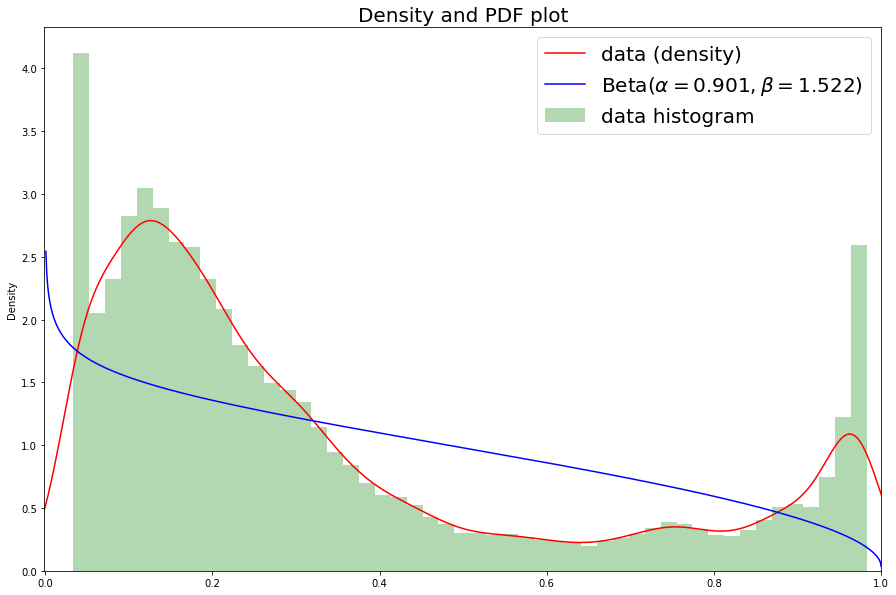

In [185]:
# Plot data density plot
sm = np.random.choice(vaccination_prob, 100000, replace=False)
# sm = vaccination_prob
pd.DataFrame(sm, columns=['data (density)']).plot.density(figsize=(15,10), color='r')
plt.hist(sm, density=True, alpha=.3, bins=50, label='data histogram', color='g')

# Plot relevant Beta distribution pdf
a, b, loc, scale = params
xs = np.linspace(0,1,1000)
ys = [beta.pdf(x, a=a, b=b)*scale + loc for x in xs]
plt.plot(xs, ys, label=r'Beta($\alpha={:.3f}, \beta={:.3f}$)'.format(a,b), color='b')

plt.xlim([-0.001,1])

plt.title('Density and PDF plot', size=20)

plt.legend(fontsize=20)

plt.show()

#### Fist half

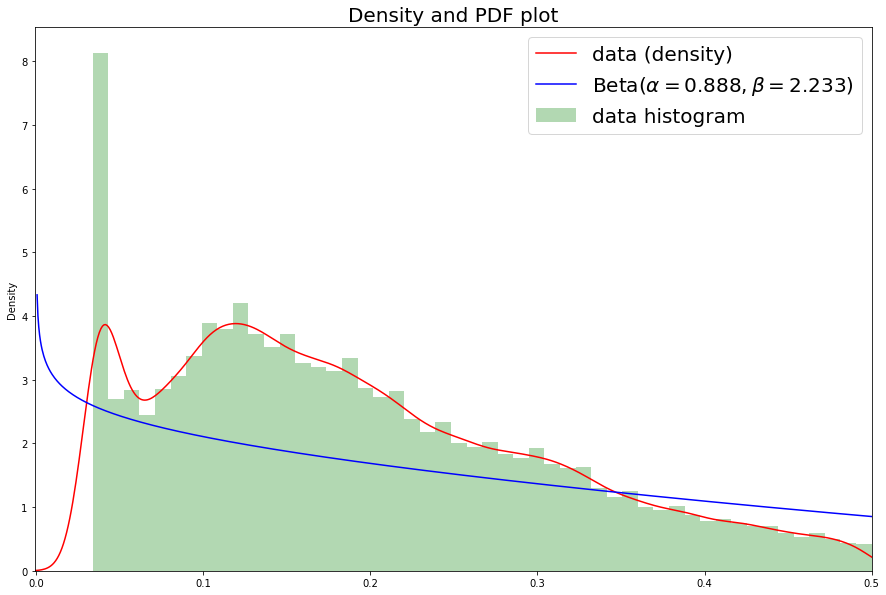

In [190]:
# Plot data density plot
pd.DataFrame(vacc_1, columns=['data (density)']).plot.density(figsize=(15,10), color='r')
plt.hist(vacc_1, density=True, alpha=.3, bins=50, label='data histogram', color='g')

# Plot relevant Beta distribution pdf
a, b, loc, scale = params_1
xs = np.linspace(0,0.5,1000)
ys = [beta.pdf(x, a=a, b=b) for x in xs]
plt.plot(xs, ys, label=r'Beta($\alpha={:.3f}, \beta={:.3f}$)'.format(a,b), color='b')

plt.xlim([-0.001,0.5])

plt.title('Density and PDF plot', size=20)

plt.legend(fontsize=20)

plt.show()

#### Second half

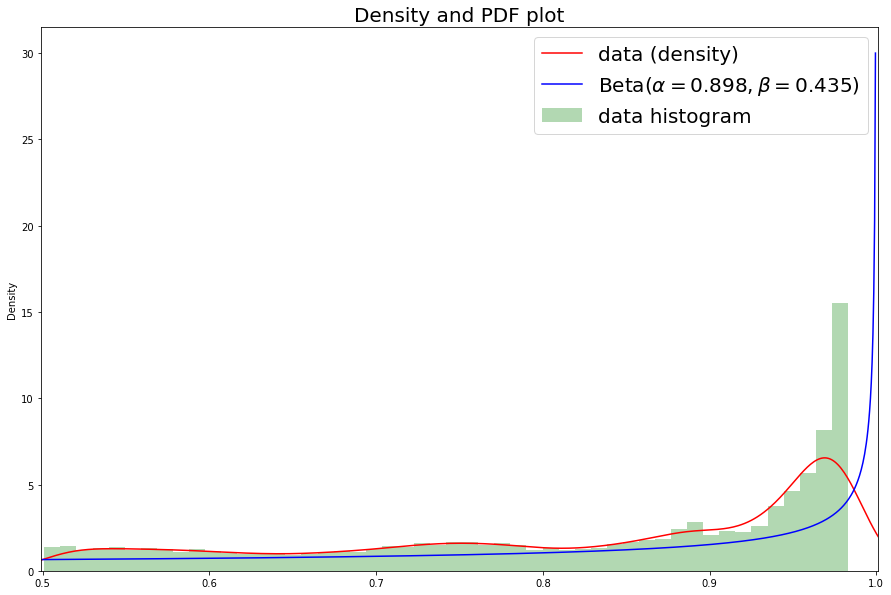

In [194]:
# Plot data density plot
pd.DataFrame(vacc_2, columns=['data (density)']).plot.density(figsize=(15,10), color='r')
plt.hist(vacc_2, density=True, alpha=.3, bins=50, label='data histogram', color='g')

# Plot relevant Beta distribution pdf
a, b, loc, scale = params_2
xs = np.linspace(0.5,1,1000)
ys = [beta.pdf(x, a=a, b=b) for x in xs]
plt.plot(xs, ys, label=r'Beta($\alpha={:.3f}, \beta={:.3f}$)'.format(a,b), color='b')

plt.xlim([0.5-0.001,1+0.001])

plt.title('Density and PDF plot', size=20)

plt.legend(fontsize=20)

plt.show()

### Plot original data and data generated from the distribition

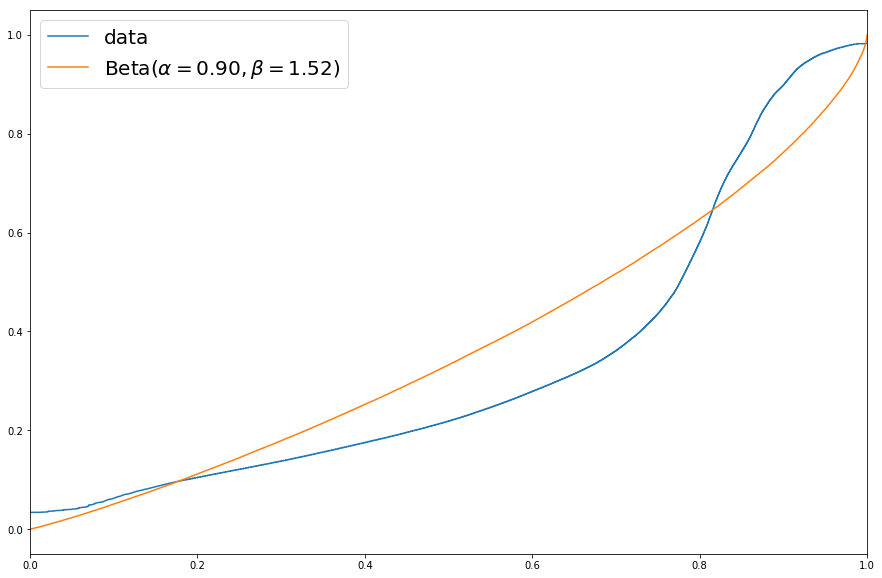

In [199]:
# Get the fitted parameters
a, b, mean, scale = params

n = vaccination_prob.size
xs = np.linspace(0,1,n)

# Generate values from Beta distribution with the fitted parameters
ys = np.random.beta(a=a, b=b, size=n)

# Sort values
vaccination_prob_sorted = vaccination_prob.copy()
vaccination_prob_sorted.sort()
ys.sort()


plt.figure(figsize=(15,10))
# Plot data
plt.plot(xs, vaccination_prob_sorted, label='data')
# Plot generated data
plt.plot(xs, ys, label=r'Beta($\alpha={:.2f}, \beta={:.2f}$)'.format(a,b))

plt.xlim([0,1])
plt.legend(fontsize=20)

plt.show()

# OLD

In [164]:
z = np.random.beta(a=0.5, b=0.5, size=100000)*53 +1000

In [165]:
beta.fit(z)

(0.546271923349452, 0.5309080813882987, 1000.0000000002312, 53.000000236490706)